# pandas練習


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Series
順序のあるディクショナリ的な特徴を持った1次元配列的なデータ。Seriesはインデックスを持つ。（配列の添字とは異なる）  
デフォルトでintegerのインデックスが作られる。

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

In [3]:
s.index #integerのindex

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

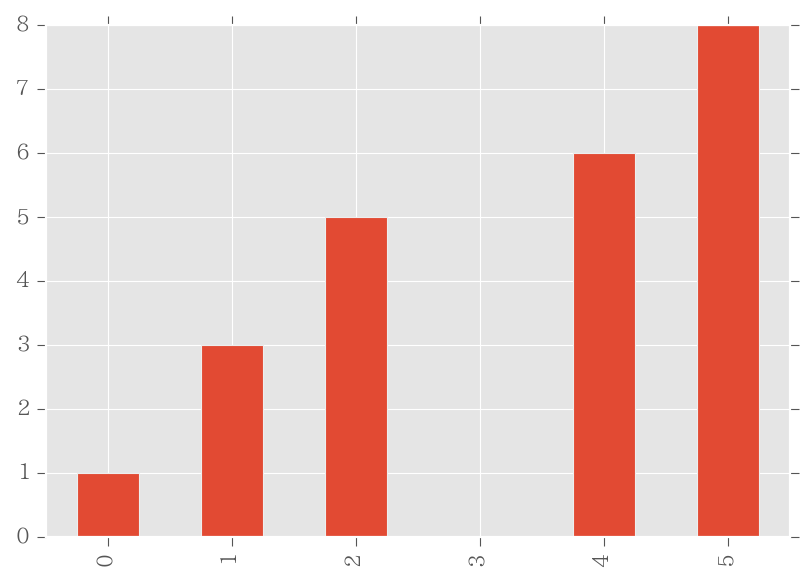

In [89]:
s.plot('bar')

##### dropでインデックスを指定した削除
配列の添字のように値がつまったりしない。あくまでもインデックス。

In [28]:
s.drop(3)

0    1
1    3
2    5
4    6
5    8
dtype: float64

In [29]:
s.drop([1,2,3])

0    1
4    6
5    8
dtype: float64

##### 整数以外のインデックスにすることも可能

In [4]:
s2 = pd.Series([2, 4, 6, 8], index=['a', 'b', 'c', 'd'])
s2

a    2
b    4
c    6
d    8
dtype: int64

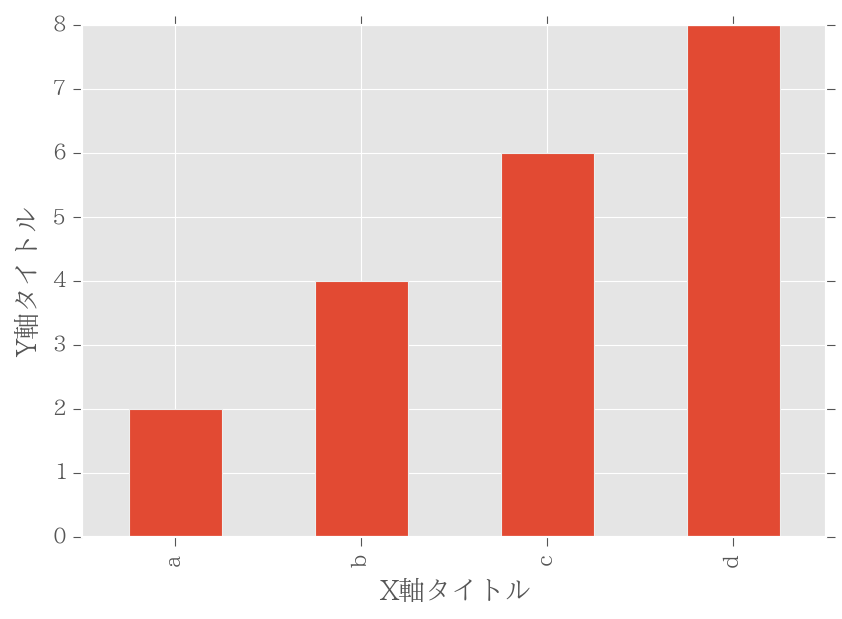

In [96]:
ax = s2.plot('bar')
ax.set_xlabel('X軸タイトル')
ax.set_ylabel('Y軸タイトル')

##### 日付のインデックス

In [97]:
pd.date_range('20160201', periods=4)

DatetimeIndex(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04'], dtype='datetime64[ns]', freq='D', tz=None)

In [98]:
# 日付のインデックスを持ったSeries
s3 = pd.Series(np.arange(10, 60, 10), index=pd.date_range('20160201', periods=5))
s3

2016-02-01    10
2016-02-02    20
2016-02-03    30
2016-02-04    40
2016-02-05    50
Freq: D, dtype: int64

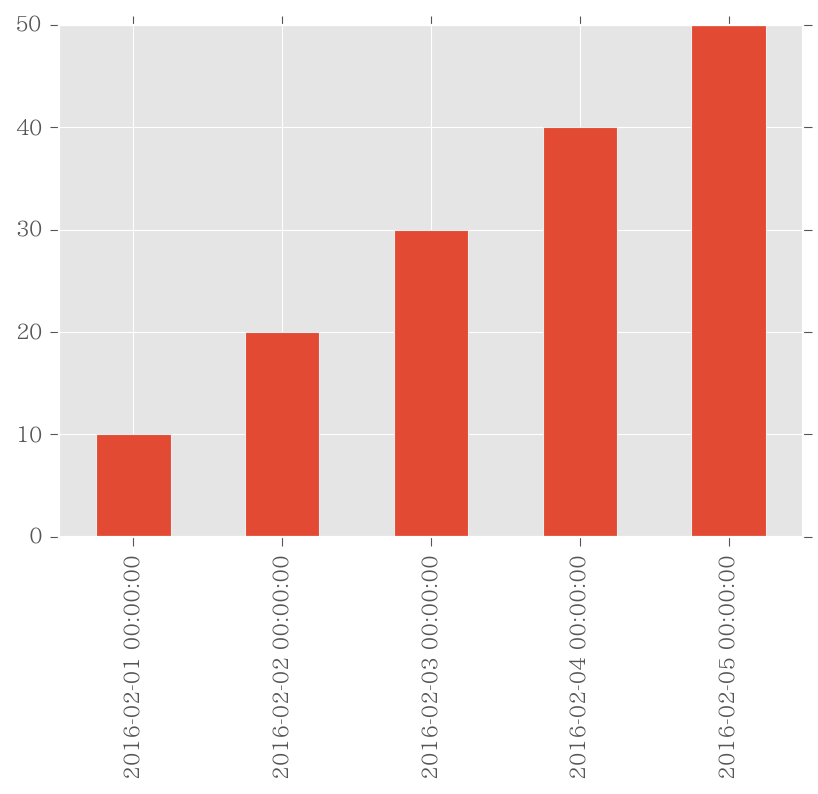

In [99]:
#プロット
s3.plot('bar')

In [108]:
#6時間おきのデータに拡張
s3.asfreq('6H')

2016-02-01 00:00:00    10
2016-02-01 06:00:00   NaN
2016-02-01 12:00:00   NaN
2016-02-01 18:00:00   NaN
2016-02-02 00:00:00    20
2016-02-02 06:00:00   NaN
2016-02-02 12:00:00   NaN
2016-02-02 18:00:00   NaN
2016-02-03 00:00:00    30
2016-02-03 06:00:00   NaN
2016-02-03 12:00:00   NaN
2016-02-03 18:00:00   NaN
2016-02-04 00:00:00    40
2016-02-04 06:00:00   NaN
2016-02-04 12:00:00   NaN
2016-02-04 18:00:00   NaN
2016-02-05 00:00:00    50
Freq: 6H, dtype: float64

In [114]:
# NaNを埋める ffill, bfill..

s3.asfreq('6H', method='ffill')

2016-02-01 00:00:00    10
2016-02-01 06:00:00    10
2016-02-01 12:00:00    10
2016-02-01 18:00:00    10
2016-02-02 00:00:00    20
2016-02-02 06:00:00    20
2016-02-02 12:00:00    20
2016-02-02 18:00:00    20
2016-02-03 00:00:00    30
2016-02-03 06:00:00    30
2016-02-03 12:00:00    30
2016-02-03 18:00:00    30
2016-02-04 00:00:00    40
2016-02-04 06:00:00    40
2016-02-04 12:00:00    40
2016-02-04 18:00:00    40
2016-02-05 00:00:00    50
Freq: 6H, dtype: int64

In [128]:
# interpolateで補間
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html
s4 = s3.asfreq('6H').interpolate()
s4

2016-02-01 00:00:00    10.0
2016-02-01 06:00:00    12.5
2016-02-01 12:00:00    15.0
2016-02-01 18:00:00    17.5
2016-02-02 00:00:00    20.0
2016-02-02 06:00:00    22.5
2016-02-02 12:00:00    25.0
2016-02-02 18:00:00    27.5
2016-02-03 00:00:00    30.0
2016-02-03 06:00:00    32.5
2016-02-03 12:00:00    35.0
2016-02-03 18:00:00    37.5
2016-02-04 00:00:00    40.0
2016-02-04 06:00:00    42.5
2016-02-04 12:00:00    45.0
2016-02-04 18:00:00    47.5
2016-02-05 00:00:00    50.0
Freq: 6H, dtype: float64

# DataFrame
データフレームは、インデックスと列のデータを持つExcelのスプレットシート的なデータ。


In [31]:
# 日付のインデックスを作成してみる。あとでこの日付インデックスをDataFrameに使う
dates = pd.date_range('20150101', periods=6)
dates

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)